In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [8]:
df = pd.read_csv('ex2data1.txt', sep=',', header=None)
df.columns = ['exam_score_1', 'exam_score_2', 'label']

In [9]:
df.head(5)

,exam_score_1,exam_score_2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
exam_score_1,100.0,65.644274,19.458222,30.058822,50.919511,67.032988,80.212529,99.827858
exam_score_2,100.0,66.221998,18.582783,30.603263,48.179205,67.682381,79.360605,98.869436
label,100.0,0.600000,0.492366,0.000000,0.000000,1.000000,1.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   exam_score_1  100 non-null    float64
 1   exam_score_2  100 non-null    float64
 2   label         100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


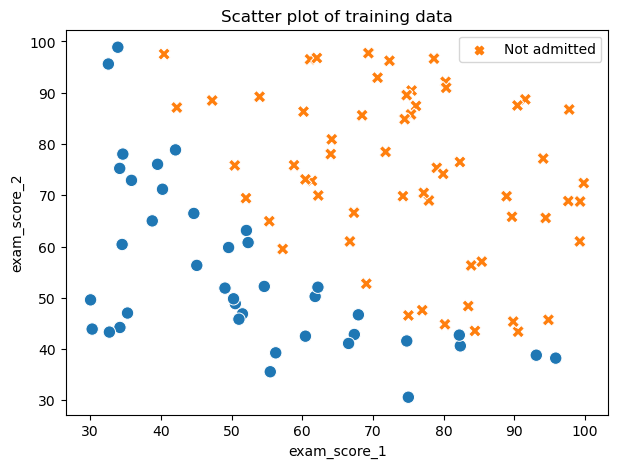

In [12]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=df, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['Not admitted', 'Admitted'])
plt.title('Scatter plot of training data')
plt.show(ax)

Sigmoid

In [13]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

sigmoid(0)

0.5

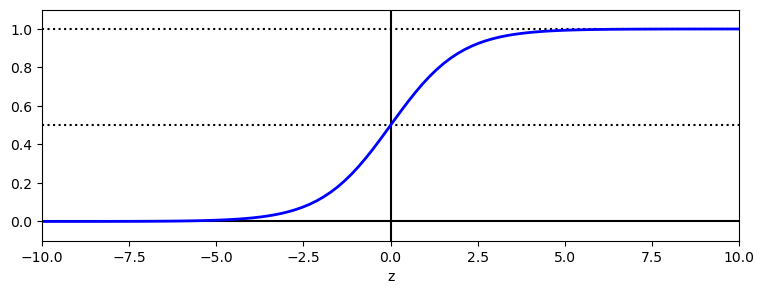

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(z, sig, "b-", linewidth=2)
plt.xlabel("z")
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

Cost Function

In [15]:
def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #trick to make numpy minimize work
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)

    return J, grad

In [16]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)),df[['exam_score_1', 'exam_score_2']].values))
y = np.array(df.label.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1]))

In [17]:
cost, grad = cost_function(initial_theta, X, y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad.T)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [18]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)),df[['exam_score_1', 'exam_score_2']].values))
y = np.array(df.label.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1]))

In [5]:
def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #trick to make numpy minimize work
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)

    return J, grad

In [19]:
test_theta = np.array([-24, 0.2, 0.2])
[cost, grad] = cost_function(test_theta, X, y)

print('Cost at test theta:', cost)
print('Expected cost (approx): 0.218')
print('Gradient at test theta:')
print(grad.T)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647')

Cost at test theta: [[0.21833019]]
Expected cost (approx): 0.218
Gradient at test theta:
[[0.04290299]
 [2.56623412]
 [2.64679737]]
Expected gradients (approx):
 0.043
 2.566
 2.647


In [11]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='newton-cg', max_iter=400)
log_reg.fit(df[['exam_score_1', 'exam_score_2']].values,
            df.label.values)

LogisticRegression(max_iter=400, solver='newton-cg')

In [12]:
log_reg.intercept_, log_reg.coef_

(array([-25.05200379]), array([[0.2053533 , 0.20058239]]))

In [13]:
log_reg.score(df[['exam_score_1', 'exam_score_2']].values,
              df.label.values)

0.89

In [20]:
import scipy.optimize as opt
def optimize_theta(X, y, initial_theta):
    opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',
                               jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']

In [21]:
opt_theta, cost = optimize_theta(X, y, initial_theta)

C:\Users\manth\AppData\Local\Temp\ipykernel_8340\1274892550.py:3: OptimizeWarning: Unknown solver options: maxiter
  opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',


In [22]:
print('Cost at theta found by fminunc:', cost)
print('Expected cost (approx): 0.203')
print('theta:\n', opt_theta.reshape(-1,1))
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')

Cost at theta found by fminunc: 0.20349770158947458
Expected cost (approx): 0.203
theta:
 [[-25.16131863]
 [  0.20623159]
 [  0.20147149]]
Expected theta (approx):
 -25.161
 0.206
 0.201


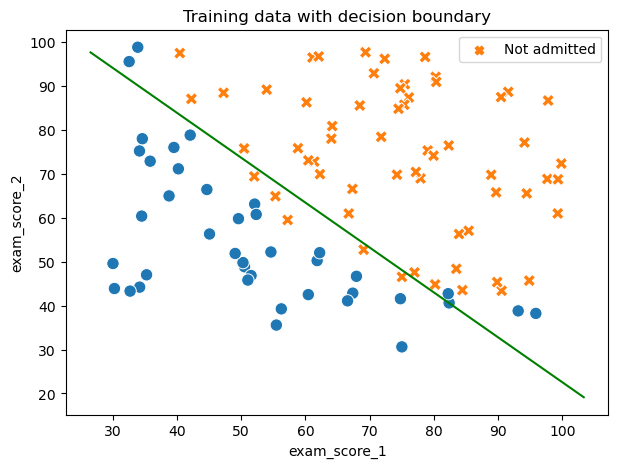

In [23]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=df, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['Not admitted', 'Admitted'])
plt.title('Training data with decision boundary')

plot_x = np.array(ax.get_xlim())
plot_y = (-1/opt_theta[2]*(opt_theta[1]*plot_x + opt_theta[0]))
plt.plot(plot_x, plot_y, '-', c="green")
plt.show(ax)

In [24]:
prob = sigmoid(np.array([1, 45, 85]).dot(opt_theta))
print('For a student with scores 45 and 85, we predict an admission probability of', prob)
print('Expected value: 0.775 +/- 0.002');

For a student with scores 45 and 85, we predict an admission probability of 0.7762906238448227
Expected value: 0.775 +/- 0.002


In [25]:
def predict(X, theta):
    y_pred = [1 if sigmoid(X[i, :].dot(theta)) >= 0.5 else 0 for i in range(0, X.shape[0])]
    return y_pred

In [26]:
X = np.hstack((np.ones((m,1)),df[['exam_score_1', 'exam_score_2']].values))

y_pred_prob = predict(X, opt_theta)
f'Train accuracy: {np.mean(y_pred_prob == df.label.values) * 100}'

'Train accuracy: 89.0'